# Datos

Parte fundamental de la ciencia de datos consiste en importar información y preprocesarla. La carga de información puede ser por varios métodos. El **preprocesamiento** suele tomar considerable tiempo en el proceso de análisis de datos. Éste proceso consiste en modificar la información recibida de tal manera que esté lista para utilizarse para posteriores análisis.

Como ejemplo para el curso, se usa un conjunto de datos georrerefenciados por trece estaciones de monitoreo del Área Metropolitana de Monterrey durante 2017 y 2019. Estas estaciones recogen datos meteorológicos y de contaminantes ambientales cada hora por parte del [Sistema Integral de Monitoreo Ambiental](http://aire.nl.gob.mx/).

A continuación se muestran los valores que se registran.

In [1]:
import math

In [2]:
# Arreglo de diccionarios
pollutants = [
  {
    'name' : '$\\text{PM}_{10}$',
    'min_value' : 2,
    'max_value' : 850,
    'unit' : '$\mu\\text{gr}$ / $\\text{m}^3$'
  },
  {
    'name' : '$\\text{PM}_{2.5}$',
    'min_value' : 2,
    'max_value' : 850,
    'unit' : '$\mu\\text{gr}$ / $\\text{m}^3$'
  },
  {
    'name' : '$\\text{O}_3$',
    'min_value' : 1,
    'max_value' : 200,
    'unit' : 'ppb'
  },
  {
    'name' : 'NO',
    'min_value' : 1,
    'max_value' : 350,
    'unit' : 'ppb'
  },
  {
    'name' : '$\\text{NO}_2$',
    'min_value' : 1,
    'max_value' : 150,
    'unit' : 'ppb'
  },
  {
    'name' : '$\\text{NO}_X$',
    'min_value' : 1,
    'max_value' : 350,
    'unit' : 'ppb'
  },
  {
    'name' : '$\\text{SO}_2$',
    'min_value' : 1,
    'max_value' : 200,
    'unit' : 'ppb'
  },
  {
    'name' : 'CO',
    'min_value' : 0.050,
    'max_value' : 15,
    'unit' : 'ppm'
  },
  {
    'name' : 'Temperature',
    'min_value' : -15,
    'max_value' : 50,
    'unit' : 'C'
  },
  {
    'name' : 'Relative humidity',
    'min_value' : 0,
    'max_value' : 100,
    'unit' : '%'
  },
  {
    'name' : 'Barometric pressure',
    'min_value' : 650,
    'max_value' : 750,
    'unit' : 'mmHg'
  },
  {
    'name' : 'Solar radiation',
    'min_value' : 0,
    'max_value' : 1.2,
    'unit' : 'Langley / h'
  },
  {
    'name' : 'Rainfall',
    'min_value' : 0,
    'max_value' : math.inf,
    'unit' : 'mm / h'
  },
  {
    'name' : 'Wind velocity',
    'min_value' : 0,
    'max_value' : 60,
    'unit' : 'Km / h'
  },
  {
    'name' : 'Wind direction',
    'min_value' : 0,
    'max_value' : 360,
    'unit' : 'Azimutales'
  },
]

[`pandas`](https://pandas.pydata.org/) es una librería de Python que permite manipular fuentes de datos como tablas (o _dataframes_).

In [3]:
import pandas as pd

# Permite mostrar Markdown como salida en Jupyter
# https://stackoverflow.com/a/36313217
from IPython.display import Markdown

In [4]:
df_pollutants_def = pd.DataFrame(pollutants)
Markdown(df_pollutants_def.to_markdown(index = False))

| name                |   min_value |   max_value | unit                          |
|:--------------------|------------:|------------:|:------------------------------|
| $\text{PM}_{10}$    |        2    |       850   | $\mu\text{gr}$ / $\text{m}^3$ |
| $\text{PM}_{2.5}$   |        2    |       850   | $\mu\text{gr}$ / $\text{m}^3$ |
| $\text{O}_3$        |        1    |       200   | ppb                           |
| NO                  |        1    |       350   | ppb                           |
| $\text{NO}_2$       |        1    |       150   | ppb                           |
| $\text{NO}_X$       |        1    |       350   | ppb                           |
| $\text{SO}_2$       |        1    |       200   | ppb                           |
| CO                  |        0.05 |        15   | ppm                           |
| Temperature         |      -15    |        50   | C                             |
| Relative humidity   |        0    |       100   | %                             |
| Barometric pressure |      650    |       750   | mmHg                          |
| Solar radiation     |        0    |         1.2 | Langley / h                   |
| Rainfall            |        0    |       inf   | mm / h                        |
| Wind velocity       |        0    |        60   | Km / h                        |
| Wind direction      |        0    |       360   | Azimutales                    |

El objetivo de este estudio radica en hacer interpolación espacio temporal mediante métodos de aprendizaje automático.

Un archivo CSV tiene una parte de la base de datos, que se cargan con `pd.read_csv`.

Como una columna de datos contiene información temporal en un formato que no se apega a los estándares de `pandas`, hace falta transformarla. Se usa la librería [`datetime`](https://docs.python.org/3/library/datetime.html) y aprovechamos de usar el maravilloso `lambda`.

In [5]:
# https://towardsdatascience.com/4-tricks-you-should-know-to-parse-date-columns-with-pandas-read-csv-27355bb2ad0e
from datetime import datetime
custom_date_parser = lambda x: datetime.strptime(x, '%d-%b-%y %H')

In [6]:
df_pollutants_all = pd.read_csv("../data/all.csv",
  # Especifica qué columnas se van a leer
  usecols=[
    'timestamp',
    'station',
    'CO',
    'NO',
    'NO2',
    'NOX',
    'O3',
    'PM10',
    'PM2_5',
    'pressure',
    'rainfall',
    'humidity',
    'SO2',
    'solar',
    'temperature',
    'velocity',
    'direction',
    'valid',
  ],
  # Qué tipo de dato corresponde a cada columna
  dtype={
    'timestamp' : str,
    'station' : str,
    'CO' : float,
    'NO' : float,
    'NO2' : float,
    'NOX' : float,
    'O3' : float,
    'PM10' : float,
    'PM2_5' : float,
    'pressure' : float,
    'rainfall' : float,
    'humidity' : float,
    'SO2' : float,
    'solar' : float,
    'temperature' : float,
    'velocity' : float,
    'direction' : float,
    'valid' : int,
  },
  # En la columna timestamp
  parse_dates = ['timestamp'],
  # Guardar las fechas preprocesadas
  date_parser = custom_date_parser
)

In [7]:
# Total de registros
len(df_pollutants_all)

1542696

In [8]:
# Primeros datos
df_pollutants_all.head()

,timestamp,station,CO,NO,NO2,NOX,O3,PM10,PM2_5,pressure,rainfall,humidity,SO2,solar,temperature,velocity,direction,valid
0,1993-01-01,Sureste,0.95,0.25,5.75,6.75,19.0,41.0,NaN,774.85,0.0,NaN,2.50,0.007,17.25,17.54,96.84,1
1,1993-01-01,Noreste,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1993-01-01,Centro,2.58,1.25,11.00,8.50,18.5,30.5,NaN,NaN,NaN,NaN,2.00,NaN,17.25,11.91,86.94,1
3,1993-01-01,Noroeste,0.98,4.25,6.75,11.00,24.5,60.0,NaN,NaN,0.0,NaN,9.25,NaN,17.45,45.29,96.84,1
4,1993-01-01,Suroeste,1.65,3.00,14.25,17.50,6.0,38.5,NaN,NaN,NaN,NaN,0.25,NaN,16.65,15.77,93.96,1


In [9]:
# Últimos registros; en ambos se pueden especificar cuántos mostrar
df_pollutants_all.tail(3)

,timestamp,station,CO,NO,NO2,NOX,O3,PM10,PM2_5,pressure,rainfall,humidity,SO2,solar,temperature,velocity,direction,valid
1542693,2018-12-31 23:00:00,Sureste3,5.97,58.400002,11.800000,70.099998,13.0,392.0,295.0,732.200012,0.0,81.0,6.8,0.036,10.49,1.5,3.0,1
1542694,2018-12-31 23:00:00,Sur,1.36,NaN,NaN,NaN,NaN,40.0,8.0,706.799988,0.0,75.0,10.6,0.002,9.73,2.1,98.0,1
1542695,2018-12-31 23:00:00,Norte2,3.39,149.399994,59.900002,185.100006,NaN,103.0,NaN,713.700012,0.0,66.0,9.0,0.000,12.26,3.8,61.0,1


In [10]:
# Muestra de 4 individuos sin reemplazo
df_pollutants_all.sample(4, replace = False)

,timestamp,station,CO,NO,NO2,NOX,O3,PM10,PM2_5,pressure,rainfall,humidity,SO2,solar,temperature,velocity,direction,valid
502014,2004-06-15 10:00:00,Suroeste,NaN,6.80,20.70,27.40,52.0,165.0,35.0,714.40,NaN,61.0,6.8,NaN,27.93,9.90,87.00,1
89663,1995-01-18 04:00:00,Noroeste,0.60,6.25,17.75,24.00,0.0,49.5,NaN,NaN,NaN,NaN,9.5,NaN,16.20,5.95,295.20,1
360680,2001-03-25 16:00:00,Sureste,0.88,0.25,9.50,9.75,16.5,24.0,NaN,774.09,0.0,NaN,0.0,0.080,12.20,5.39,34.92,1
1196497,2015-08-26 12:00:00,Noreste,0.87,4.30,5.60,9.60,43.0,88.0,12.0,721.90,0.0,56.0,8.6,0.879,31.44,11.10,90.00,1


Los datos de `df_pollutants_all` van de 1993 a 2018. En un archivo XLSX se encuentran los datos de 2019.

In [11]:
df_pollutants_2019 = pd.read_excel("../data/2019_pollutants.xlsx")
df_pollutants_2019

,CE-MET,Unnamed: 1,SURESTE,SURESTE.1,SURESTE.2,SURESTE.3,SURESTE.4,SURESTE.5,SURESTE.6,SURESTE.7,...,NORTE 2.7,NORTE 2.8,NORTE 2.9,NORTE 2.10,NORTE 2.11,NORTE 2.12,NORTE 2.13,NORTE 2.14,Unnamed: 209,Unnamed: 210
0,Date - Time,NaT,CO,NO,NO2,NOX,O3,PM10,PM2.5,PRS,...,PRS,RAINF,RH,SO2,SR,TOUT,WSR,WDR,NaN,NaN
1,NaN,NaT,ppm,ppb,ppb,ppb,ppb,ug/m3,ug/m3,mmhg,...,mmhg,mm/hr,%,ppb,KW/m2,degC,KMPH,DEG,NaN,NaN
2,2019-01-01 00:00:00,2019-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,215.45,NaN,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2019-01-01 01:00:00,2019-01-01 01:00:00,2.74,NaN,NaN,NaN,5,242,NaN,725.8,...,713.5,0,77,11.6,0,10.41,2.2,23,NaN,NaN
4,2019-01-01 02:00:00,2019-01-01 02:00:00,3.01,NaN,NaN,NaN,6,281,NaN,725.7,...,713.3,0,74,26.6,0,10.47,2.9,269,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,2019-12-31 20:00:00,2019-12-31 20:00:00,1.47,NaN,NaN,NaN,22,25,23.84,735.5,...,715.6,0,90,19.1,0,10.73,7.4,109,NaN,NaN
8759,2019-12-31 21:00:00,2019-12-31 21:00:00,1.59,NaN,NaN,NaN,23,37,31.97,735.9,...,716,0,90,19.9,0,10.89,5.7,86,NaN,NaN
8760,2019-12-31 22:00:00,2019-12-31 22:00:00,1.76,NaN,NaN,NaN,16,46,NaN,735.9,...,715.9,0,91,21.8,0,10.93,4.6,107,NaN,NaN
8761,2019-12-31 23:00:00,2019-12-31 23:00:00,1.69,NaN,NaN,NaN,20,60,55.31,735.7,...,715.8,0,91,20.7,0,11.05,5.6,85,NaN,NaN


Esta base de datos tiene la información organizada de una manera muy distinta a como aparece en `df_pollutants_all`. Las primeras dos columnas muetran la fecha del registro. Las siguientes llevan el nombre de la estación donde se hace el resgistro, seguida por un número entero. La primera fila muestra, para cada una de esas estaciones, la variable que están registrando. Hay que lidiar con todo eso.

In [12]:
# Columnas
df_pollutants_2019.columns

Index(['CE-MET', 'Unnamed: 1', 'SURESTE', 'SURESTE.1', 'SURESTE.2',
       'SURESTE.3', 'SURESTE.4', 'SURESTE.5', 'SURESTE.6', 'SURESTE.7',
       ...
       'NORTE 2.7', 'NORTE 2.8', 'NORTE 2.9', 'NORTE 2.10', 'NORTE 2.11',
       'NORTE 2.12', 'NORTE 2.13', 'NORTE 2.14', 'Unnamed: 209',
       'Unnamed: 210'],
      dtype='object', length=211)

In [13]:
# Columnas que contienen Unnamed
unnamed = [c for c in df_pollutants_2019.columns if 'Unnamed' in c]
unnamed

['Unnamed: 1',
 'Unnamed: 17',
 'Unnamed: 33',
 'Unnamed: 49',
 'Unnamed: 65',
 'Unnamed: 81',
 'Unnamed: 97',
 'Unnamed: 113',
 'Unnamed: 129',
 'Unnamed: 145',
 'Unnamed: 161',
 'Unnamed: 177',
 'Unnamed: 193',
 'Unnamed: 209',
 'Unnamed: 210']

In [14]:
# Filtro para mostrar sólo columnas Unnamed
df_pollutants_2019[unnamed]

,Unnamed: 1,Unnamed: 17,Unnamed: 33,Unnamed: 49,Unnamed: 65,Unnamed: 81,Unnamed: 97,Unnamed: 113,Unnamed: 129,Unnamed: 145,Unnamed: 161,Unnamed: 177,Unnamed: 193,Unnamed: 209,Unnamed: 210
0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,2019-12-31 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8759,2019-12-31 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8760,2019-12-31 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8761,2019-12-31 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Se comparan los valores entre la columna con índice 0 y la 1.

In [15]:
# Selector de filas y columnas por índice
df_pollutants_2019.iloc[:, 0:2] # [filas : columnas]

,CE-MET,Unnamed: 1
0,Date - Time,NaT
1,NaN,NaT
2,2019-01-01 00:00:00,2019-01-01 00:00:00
3,2019-01-01 01:00:00,2019-01-01 01:00:00
4,2019-01-01 02:00:00,2019-01-01 02:00:00
...,...,...
8758,2019-12-31 20:00:00,2019-12-31 20:00:00
8759,2019-12-31 21:00:00,2019-12-31 21:00:00
8760,2019-12-31 22:00:00,2019-12-31 22:00:00
8761,2019-12-31 23:00:00,2019-12-31 23:00:00


In [16]:
# Filas que son diferentes entre las columnas 0 y 1
filtro = df_pollutants_2019.iloc[:, 0] != df_pollutants_2019.iloc[:, 1]
filtro

0        True
1        True
2       False
3       False
4       False
        ...  
8758    False
8759    False
8760    False
8761    False
8762     True
Length: 8763, dtype: bool

In [17]:
# Filtro a partir de comparación booleana
df_pollutants_2019[filtro]

,CE-MET,Unnamed: 1,SURESTE,SURESTE.1,SURESTE.2,SURESTE.3,SURESTE.4,SURESTE.5,SURESTE.6,SURESTE.7,...,NORTE 2.7,NORTE 2.8,NORTE 2.9,NORTE 2.10,NORTE 2.11,NORTE 2.12,NORTE 2.13,NORTE 2.14,Unnamed: 209,Unnamed: 210
0,Date - Time,NaT,CO,NO,NO2,NOX,O3,PM10,PM2.5,PRS,...,PRS,RAINF,RH,SO2,SR,TOUT,WSR,WDR,NaN,NaN
1,NaN,NaT,ppm,ppb,ppb,ppb,ppb,ug/m3,ug/m3,mmhg,...,mmhg,mm/hr,%,ppb,KW/m2,degC,KMPH,DEG,NaN,NaN
6312,NaN,2019-09-20 22:00:00,0.52,NaN,NaN,NaN,18,NaN,8.03,724.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8762,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Se copia la fila $6312$ de la columna con índice 1 a la 0.

In [18]:
df_pollutants_2019.iloc[6312, 1]

Timestamp('2019-09-20 22:00:00')

Antes de modificar una tabla, recomiendo hacer una copia de la misma.

In [19]:
# Copiar dataframe
df_pollutants_2019_mod = df_pollutants_2019.copy()

In [20]:
# Copiar valores por posición
df_pollutants_2019_mod.iloc[6312, 0] = df_pollutants_2019_mod.iloc[6312, 1]
df_pollutants_2019_mod.iloc[6312, 0:2]

CE-MET        2019-09-20 22:00:00
Unnamed: 1    2019-09-20 22:00:00
Name: 6312, dtype: object

In [21]:
# No nulos por columna
df_pollutants_2019_mod[unnamed].count()

Unnamed: 1      8760
Unnamed: 17        0
Unnamed: 33        0
Unnamed: 49        0
Unnamed: 65        0
Unnamed: 81        0
Unnamed: 97        0
Unnamed: 113       0
Unnamed: 129       0
Unnamed: 145       0
Unnamed: 161       0
Unnamed: 177       0
Unnamed: 193       0
Unnamed: 209       0
Unnamed: 210       6
dtype: int64

In [22]:
# Se eliminan las columnas con Unnamed
df_pollutants_2019_mod = df_pollutants_2019.drop(columns = unnamed)
df_pollutants_2019_mod.head()

,CE-MET,SURESTE,SURESTE.1,SURESTE.2,SURESTE.3,SURESTE.4,SURESTE.5,SURESTE.6,SURESTE.7,SURESTE.8,...,NORTE 2.5,NORTE 2.6,NORTE 2.7,NORTE 2.8,NORTE 2.9,NORTE 2.10,NORTE 2.11,NORTE 2.12,NORTE 2.13,NORTE 2.14
0,Date - Time,CO,NO,NO2,NOX,O3,PM10,PM2.5,PRS,RAINF,...,PM10,PM2.5,PRS,RAINF,RH,SO2,SR,TOUT,WSR,WDR
1,NaN,ppm,ppb,ppb,ppb,ppb,ug/m3,ug/m3,mmhg,mm/hr,...,ug/m3,ug/m3,mmhg,mm/hr,%,ppb,KW/m2,degC,KMPH,DEG
2,2019-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,215.45,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
3,2019-01-01 01:00:00,2.74,NaN,NaN,NaN,5,242,NaN,725.8,0,...,413,343,713.5,0,77,11.6,0,10.41,2.2,23
4,2019-01-01 02:00:00,3.01,NaN,NaN,NaN,6,281,NaN,725.7,0,...,367,NaN,713.3,0,74,26.6,0,10.47,2.9,269


La fila 1 sólo aporta la unidad en que se mide la variable de los datos, así que se elimina.

In [23]:
# Elimina fila por índice
df_pollutants_2019_mod = df_pollutants_2019_mod.drop(1)
df_pollutants_2019_mod.head()

,CE-MET,SURESTE,SURESTE.1,SURESTE.2,SURESTE.3,SURESTE.4,SURESTE.5,SURESTE.6,SURESTE.7,SURESTE.8,...,NORTE 2.5,NORTE 2.6,NORTE 2.7,NORTE 2.8,NORTE 2.9,NORTE 2.10,NORTE 2.11,NORTE 2.12,NORTE 2.13,NORTE 2.14
0,Date - Time,CO,NO,NO2,NOX,O3,PM10,PM2.5,PRS,RAINF,...,PM10,PM2.5,PRS,RAINF,RH,SO2,SR,TOUT,WSR,WDR
2,2019-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,215.45,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
3,2019-01-01 01:00:00,2.74,NaN,NaN,NaN,5,242,NaN,725.8,0,...,413,343,713.5,0,77,11.6,0,10.41,2.2,23
4,2019-01-01 02:00:00,3.01,NaN,NaN,NaN,6,281,NaN,725.7,0,...,367,NaN,713.3,0,74,26.6,0,10.47,2.9,269
5,2019-01-01 03:00:00,2.01,NaN,NaN,NaN,4,398,235.33,725.7,0,...,NaN,756,713.2,0,71,27.3,0,10.21,3.8,252


In [24]:
# Separación de cadena por .
df_pollutants_2019_mod.columns[2].split('.')

['SURESTE', '1']

In [25]:
columnas = list( # 2: A lista
    set( # 1: Sin repetidos
        [x.split('.')[0].title() for x in list(df_pollutants_2019_mod.columns)] # 0: Todos los nombres de columna antes del punto
    )
)
columnas

['Noreste',
 'Sur',
 'Centro',
 'Noroeste',
 'Sureste 3',
 'Norte 2',
 'Norte',
 'Noroeste 2',
 'Ce-Met',
 'Sureste2',
 'Sureste',
 'Noreste2',
 'Suroeste2',
 'Suroeste']

In [26]:
# De ahí se eliminan la columna del tiempo
columnas.remove('Ce-Met')
sorted(columnas)

['Centro',
 'Noreste',
 'Noreste2',
 'Noroeste',
 'Noroeste 2',
 'Norte',
 'Norte 2',
 'Sur',
 'Sureste',
 'Sureste 3',
 'Sureste2',
 'Suroeste',
 'Suroeste2']

In [27]:
# Se crea una base de datos vacía
df_pollutants_2019_def = pd.DataFrame()
for c in columnas:
  # Devuelve todas las columnas con el nombre de la estacion
  estacion = [col for col in df_pollutants_2019.columns if c == col.split('.')[0].title()]
  estacion.append('CE-MET')
  # Se toman todas las columnas de esa estación
  t = df_pollutants_2019[estacion].copy()
  # Se ponen como encabezados las variables
  t.columns = t.iloc[0]
  # Se quita la fila de encabezados que fue promovida
  t = t.drop(0)
  # y la de unidades de medida
  t = t.drop(1)
  # Se agrega la estacion y se eliminan espacios entre números y nombre
  t['station'] = c.replace(" ", "")
  # Se reinician los índices
  t = t.reset_index(drop=True)
  # Se agregan al df nuevo
  df_pollutants_2019_def = pd.concat([t, df_pollutants_2019_def], ignore_index = True)
df_pollutants_2019_def

,CO,NO,NO2,NOX,O3,PM10,PM2.5,PRS,RAINF,RH,SO2,SR,TOUT,WSR,WDV,Date - Time,station,WDR
0,NaN,NaN,NaN,NaN,NaN,NaN,315.05,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,2019-01-01 00:00:00,Suroeste,NaN
1,3,137.7,26.2,163.8,11,288,NaN,700.9,0,75,NaN,0,8.02,NaN,NaN,2019-01-01 01:00:00,Suroeste,NaN
2,3.81,181.9,24.3,206.1,14,474,456.69,700.8,0,75,NaN,0,7.91,NaN,NaN,2019-01-01 02:00:00,Suroeste,NaN
3,4.86,226,21.7,247.6,16,512,NaN,700.7,0,76,NaN,0,7.35,NaN,NaN,2019-01-01 03:00:00,Suroeste,NaN
4,4.09,204.5,22.5,226.9,12,597,415.25,700.7,0,75,NaN,0,7.07,NaN,NaN,2019-01-01 04:00:00,Suroeste,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113888,NaN,0.5,NaN,NaN,NaN,31,NaN,721.9,NaN,96,2.2,0,10.21,10,NaN,2019-12-31 20:00:00,Noreste,NaN
113889,NaN,0.5,NaN,NaN,NaN,43,NaN,722.2,NaN,96,1.8,0,10.39,8.1,NaN,2019-12-31 21:00:00,Noreste,NaN
113890,NaN,0.5,NaN,NaN,NaN,70,NaN,722.1,NaN,96,1.8,0,10.54,8.2,NaN,2019-12-31 22:00:00,Noreste,NaN
113891,NaN,0.5,NaN,NaN,NaN,86,NaN,722,NaN,96,1.5,0,10.73,6.7,NaN,2019-12-31 23:00:00,Noreste,NaN


`WDV` y `WDR` miden grados, por lo que se pueden combinar.

In [28]:
# WDV no es nulo mientras WDR es nulo
filtro = (~df_pollutants_2019_def.WDV.isna()) & (df_pollutants_2019_def.WDR.isna())
# Cantidad de True
filtro.sum()

31165

In [29]:
# Copiar en WDR los valores de WDV
df_pollutants_2019_def.loc[filtro, 'WDR'] = df_pollutants_2019_def.loc[filtro, 'WDV']

In [30]:
# Eliminar columna en sitio
df_pollutants_2019_def.drop(columns = 'WDV', inplace = True)
df_pollutants_2019_def.head()

,CO,NO,NO2,NOX,O3,PM10,PM2.5,PRS,RAINF,RH,SO2,SR,TOUT,WSR,Date - Time,station,WDR
0,NaN,NaN,NaN,NaN,NaN,NaN,315.05,NaN,NaN,NaN,NaN,0,NaN,NaN,2019-01-01 00:00:00,Suroeste,NaN
1,3,137.7,26.2,163.8,11,288,NaN,700.9,0,75,NaN,0,8.02,NaN,2019-01-01 01:00:00,Suroeste,NaN
2,3.81,181.9,24.3,206.1,14,474,456.69,700.8,0,75,NaN,0,7.91,NaN,2019-01-01 02:00:00,Suroeste,NaN
3,4.86,226,21.7,247.6,16,512,NaN,700.7,0,76,NaN,0,7.35,NaN,2019-01-01 03:00:00,Suroeste,NaN
4,4.09,204.5,22.5,226.9,12,597,415.25,700.7,0,75,NaN,0,7.07,NaN,2019-01-01 04:00:00,Suroeste,NaN


Se emparejan los nombres de columnas.

In [31]:
df_pollutants_2019_def.columns

Index(['CO', 'NO', 'NO2', 'NOX', 'O3', 'PM10', 'PM2.5', 'PRS', 'RAINF', 'RH',
       'SO2', 'SR', 'TOUT', 'WSR', 'Date - Time', 'station', 'WDR'],
      dtype='object', name=0)

In [32]:
df_pollutants_all.columns

Index(['timestamp', 'station', 'CO', 'NO', 'NO2', 'NOX', 'O3', 'PM10', 'PM2_5',
       'pressure', 'rainfall', 'humidity', 'SO2', 'solar', 'temperature',
       'velocity', 'direction', 'valid'],
      dtype='object')

In [33]:
df_pollutants_all.columns = [
    'timestamp', 'station', 'CO', 'NO', 'NO2', 'NOX', 'O3', 'PM10', 'PM2_5',
    'BP', 'RF', 'RH', 'SO2', 'SR', 'T',
    'WV', 'WD', 'valid'
]
df_pollutants_all.head()

,timestamp,station,CO,NO,NO2,NOX,O3,PM10,PM2_5,BP,RF,RH,SO2,SR,T,WV,WD,valid
0,1993-01-01,Sureste,0.95,0.25,5.75,6.75,19.0,41.0,NaN,774.85,0.0,NaN,2.50,0.007,17.25,17.54,96.84,1
1,1993-01-01,Noreste,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1993-01-01,Centro,2.58,1.25,11.00,8.50,18.5,30.5,NaN,NaN,NaN,NaN,2.00,NaN,17.25,11.91,86.94,1
3,1993-01-01,Noroeste,0.98,4.25,6.75,11.00,24.5,60.0,NaN,NaN,0.0,NaN,9.25,NaN,17.45,45.29,96.84,1
4,1993-01-01,Suroeste,1.65,3.00,14.25,17.50,6.0,38.5,NaN,NaN,NaN,NaN,0.25,NaN,16.65,15.77,93.96,1


In [34]:
df_pollutants_2019_def.columns = [
    'CO', 'NO', 'NO2', 'NOX', 'O3', 'PM10', 'PM2_5', 'BP', 'RF', 'RH',
       'SO2', 'SR', 'T', 'WV', 'timestamp', 'station', 'WD'
]
df_pollutants_2019_def.head()

,CO,NO,NO2,NOX,O3,PM10,PM2_5,BP,RF,RH,SO2,SR,T,WV,timestamp,station,WD
0,NaN,NaN,NaN,NaN,NaN,NaN,315.05,NaN,NaN,NaN,NaN,0,NaN,NaN,2019-01-01 00:00:00,Suroeste,NaN
1,3,137.7,26.2,163.8,11,288,NaN,700.9,0,75,NaN,0,8.02,NaN,2019-01-01 01:00:00,Suroeste,NaN
2,3.81,181.9,24.3,206.1,14,474,456.69,700.8,0,75,NaN,0,7.91,NaN,2019-01-01 02:00:00,Suroeste,NaN
3,4.86,226,21.7,247.6,16,512,NaN,700.7,0,76,NaN,0,7.35,NaN,2019-01-01 03:00:00,Suroeste,NaN
4,4.09,204.5,22.5,226.9,12,597,415.25,700.7,0,75,NaN,0,7.07,NaN,2019-01-01 04:00:00,Suroeste,NaN


In [35]:
# Unir dos dataframes
df_pollutants = pd.concat([df_pollutants_all.drop(columns = ['valid']), df_pollutants_2019_def])
df_pollutants.head()

,timestamp,station,CO,NO,NO2,NOX,O3,PM10,PM2_5,BP,RF,RH,SO2,SR,T,WV,WD
0,1993-01-01 00:00:00,Sureste,0.95,0.25,5.75,6.75,19.0,41.0,NaN,774.85,0.0,NaN,2.5,0.007,17.25,17.54,96.84
1,1993-01-01 00:00:00,Noreste,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-01-01 00:00:00,Centro,2.58,1.25,11.0,8.5,18.5,30.5,NaN,NaN,NaN,NaN,2.0,NaN,17.25,11.91,86.94
3,1993-01-01 00:00:00,Noroeste,0.98,4.25,6.75,11.0,24.5,60.0,NaN,NaN,0.0,NaN,9.25,NaN,17.45,45.29,96.84
4,1993-01-01 00:00:00,Suroeste,1.65,3.0,14.25,17.5,6.0,38.5,NaN,NaN,NaN,NaN,0.25,NaN,16.65,15.77,93.96


In [36]:
# Guardar registros con tiempo
df_pollutants = df_pollutants[~df_pollutants.timestamp.isna()]

In [37]:
# Convertir a tipo datetime
df_pollutants[df_pollutants.columns[0]] = pd.to_datetime(df_pollutants.timestamp)

In [38]:
# Primer y último registro
df_pollutants.iloc[[0, -1], ]

,timestamp,station,CO,NO,NO2,NOX,O3,PM10,PM2_5,BP,RF,RH,SO2,SR,T,WV,WD
0,1993-01-01 00:00:00,Sureste,0.95,0.25,5.75,6.75,19.0,41.0,NaN,774.85,0.0,NaN,2.5,0.007,17.25,17.54,96.84
113891,2019-12-31 23:00:00,Noreste,NaN,0.5,NaN,NaN,NaN,86,NaN,722,NaN,96,1.5,0,10.73,6.7,NaN


Valores fuera de rango

In [39]:
df_pollutants_def

,name,min_value,max_value,unit
0,$\text{PM}_{10}$,2.00,850.0,$\mu\text{gr}$ / $\text{m}^3$
1,$\text{PM}_{2.5}$,2.00,850.0,$\mu\text{gr}$ / $\text{m}^3$
2,$\text{O}_3$,1.00,200.0,ppb
3,NO,1.00,350.0,ppb
4,$\text{NO}_2$,1.00,150.0,ppb
5,$\text{NO}_X$,1.00,350.0,ppb
6,$\text{SO}_2$,1.00,200.0,ppb
7,CO,0.05,15.0,ppm
8,Temperature,-15.00,50.0,C
9,Relative humidity,0.00,100.0,%


In [40]:
# Nombre de variables de sensores
sensor_variables = ['PM10', 'PM2_5', 'O3', 'NO', 'NO2', 'NOX','SO2', 'CO', 'T', 'RH', 'BP', 'SR', 'RF', 'WV', 'WD']

In [41]:
# Agregar nombre de variable en df_pollutants_def
df_pollutants_def['var_name'] = sensor_variables
df_pollutants_def

,name,min_value,max_value,unit,var_name
0,$\text{PM}_{10}$,2.00,850.0,$\mu\text{gr}$ / $\text{m}^3$,PM10
1,$\text{PM}_{2.5}$,2.00,850.0,$\mu\text{gr}$ / $\text{m}^3$,PM2_5
2,$\text{O}_3$,1.00,200.0,ppb,O3
3,NO,1.00,350.0,ppb,NO
4,$\text{NO}_2$,1.00,150.0,ppb,NO2
5,$\text{NO}_X$,1.00,350.0,ppb,NOX
6,$\text{SO}_2$,1.00,200.0,ppb,SO2
7,CO,0.05,15.0,ppm,CO
8,Temperature,-15.00,50.0,C,T
9,Relative humidity,0.00,100.0,%,RH


[`numpy`](https://numpy.org/) es una librería de Python para realizar operaciones matemáticas con arreglos y matrices.

In [42]:
import numpy as np

In [43]:
# Copia de dataframe
df_pollutants_copy = df_pollutants.copy()
# Contador de valores fuera de rango
errors = 0
for l, s in df_pollutants_def.iterrows():
    # Valores por debajo
    errors += len(df_pollutants_copy.loc[df_pollutants_copy[s.var_name] < s.min_value])
    errors += len(df_pollutants_copy.loc[df_pollutants_copy[s.var_name] > s.max_value])
    # Se usa np.nan para dejar vacíos esos lugares con valores fuera de rango
    df_pollutants_copy.loc[df_pollutants_copy[s.var_name] < s.min_value, s.var_name] = np.nan
    df_pollutants_copy.loc[df_pollutants_copy[s.var_name] > s.max_value, s.var_name] = np.nan
errors

387746

In [44]:
df_pollutants_copy

,timestamp,station,CO,NO,NO2,NOX,O3,PM10,PM2_5,BP,RF,RH,SO2,SR,T,WV,WD
0,1993-01-01 00:00:00,Sureste,0.95,NaN,5.75,6.75,19.0,41.0,NaN,NaN,0.0,NaN,2.5,0.007,17.25,17.54,96.84
1,1993-01-01 00:00:00,Noreste,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-01-01 00:00:00,Centro,2.58,1.25,11.0,8.5,18.5,30.5,NaN,NaN,NaN,NaN,2.0,NaN,17.25,11.91,86.94
3,1993-01-01 00:00:00,Noroeste,0.98,4.25,6.75,11.0,24.5,60.0,NaN,NaN,0.0,NaN,9.25,NaN,17.45,45.29,96.84
4,1993-01-01 00:00:00,Suroeste,1.65,3.0,14.25,17.5,6.0,38.5,NaN,NaN,NaN,NaN,NaN,NaN,16.65,15.77,93.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113887,2019-12-31 19:00:00,Noreste,NaN,NaN,NaN,NaN,NaN,22,NaN,722.3,NaN,96,2,0,10.15,9,NaN
113888,2019-12-31 20:00:00,Noreste,NaN,NaN,NaN,NaN,NaN,31,NaN,721.9,NaN,96,2.2,0,10.21,10,NaN
113889,2019-12-31 21:00:00,Noreste,NaN,NaN,NaN,NaN,NaN,43,NaN,722.2,NaN,96,1.8,0,10.39,8.1,NaN
113890,2019-12-31 22:00:00,Noreste,NaN,NaN,NaN,NaN,NaN,70,NaN,722.1,NaN,96,1.8,0,10.54,8.2,NaN


Visualización

In [45]:
import matplotlib.pyplot as plt

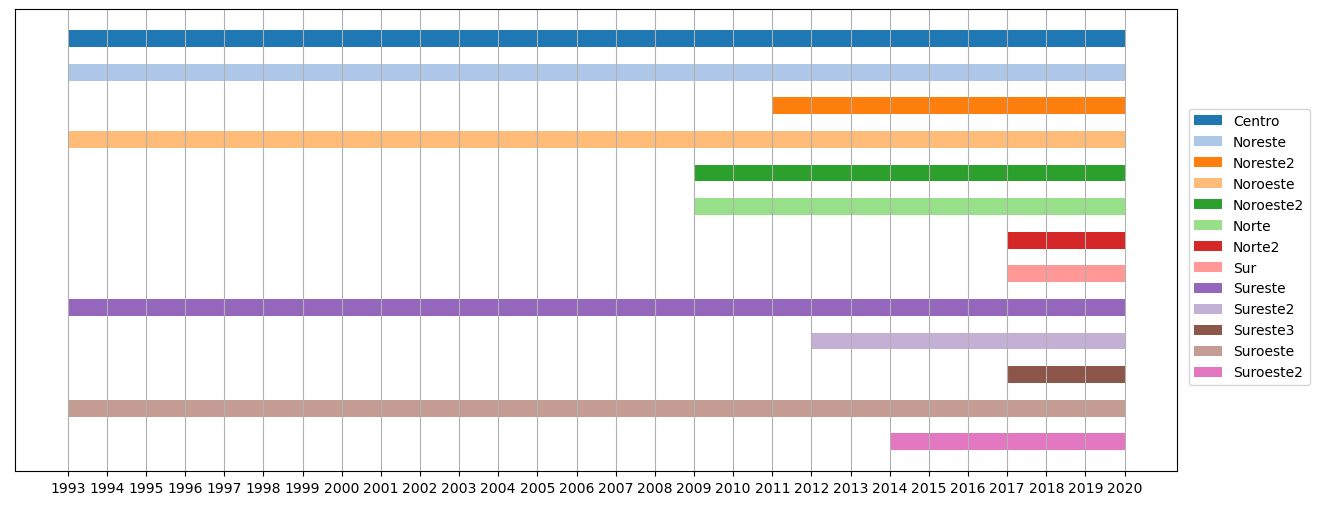

In [46]:
t = df_pollutants_copy.groupby('station')['timestamp']
cols = ['station', 'min', 'max']
rangos = pd.DataFrame(columns=cols)

i = 0
for a, b in t:
  rangos.loc[i] = [a, min(b), max(b)]
  i += 1
  
fig, ax = plt.subplots(figsize=(15,6))
cmap = plt.cm.tab20
for i, r in rangos.iterrows():
  ax.broken_barh([(rangos.iloc[i, 1], rangos.iloc[i, 2] - rangos.iloc[i, 1])], [i, 0.5], facecolors=cmap(i), label=rangos.iloc[i, 0])

ax.set_yticks([])
plt.xticks(pd.date_range(start="1993-01-01", end="2020-01-01", normalize = True, freq='YS'), labels=range(1993, 2021))
plt.grid(axis='x')
plt.legend(bbox_to_anchor=(1.12, 0.8))
plt.gca().invert_yaxis()
plt.show()

Se selecciona un rango con el que trabajar. En este caso, de 01-01-2017 a 31-12-2019.

In [47]:
df_pollutants_2017 = df_pollutants[df_pollutants.timestamp.dt.year >= 2017]
df_pollutants_2017

,timestamp,station,CO,NO,NO2,NOX,O3,PM10,PM2_5,BP,RF,RH,SO2,SR,T,WV,WD
1314936,2017-01-01 00:00:00,Sureste,3.77,NaN,NaN,NaN,6.0,206.0,NaN,720.5,0.0,72.0,11.8,0.007,18.71,8.8,22.0
1314937,2017-01-01 00:00:00,Noreste,4.66,NaN,NaN,NaN,5.0,487.0,NaN,716.6,0.0,72.0,19.1,0.0,17.94,4.3,313.0
1314938,2017-01-01 00:00:00,Centro,2.47,16.0,15.1,31.1,6.0,143.0,NaN,709.2,0.0,64.0,NaN,0.004,19.46,3.0,300.0
1314939,2017-01-01 00:00:00,Noroeste,NaN,NaN,NaN,NaN,NaN,241.0,NaN,709.2,0.0,56.0,NaN,0.0,NaN,7.0,330.0
1314940,2017-01-01 00:00:00,Suroeste,NaN,NaN,NaN,NaN,NaN,112.0,NaN,698.8,0.0,57.0,NaN,0.001,20.35,6.7,269.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113887,2019-12-31 19:00:00,Noreste,NaN,0.5,NaN,NaN,NaN,22,NaN,722.3,NaN,96,2,0,10.15,9,NaN
113888,2019-12-31 20:00:00,Noreste,NaN,0.5,NaN,NaN,NaN,31,NaN,721.9,NaN,96,2.2,0,10.21,10,NaN
113889,2019-12-31 21:00:00,Noreste,NaN,0.5,NaN,NaN,NaN,43,NaN,722.2,NaN,96,1.8,0,10.39,8.1,NaN
113890,2019-12-31 22:00:00,Noreste,NaN,0.5,NaN,NaN,NaN,70,NaN,722.1,NaN,96,1.8,0,10.54,8.2,NaN


In [48]:
def imputations(cols, df):
  t = df.groupby('station')

  for c in cols:
    i = 0
    fig, ax = plt.subplots(figsize=(16,6))
    cmap = plt.cm.tab20
    for station, ts in t:
      # https://stackoverflow.com/questions/21402384/how-to-split-a-pandas-time-series-by-nan-values/66015224#66015224
      # Convert to sparse then query index to find block locations
      # different way of converting to sparse in pandas>=0.25.0
      sparse_ts = ts[c].astype(pd.SparseDtype('float'))
      # we need to use .values.sp_index.to_block_index() in this version of pandas
      block_locs = zip(
          sparse_ts.values.sp_index.to_block_index().blocs,
          sparse_ts.values.sp_index.to_block_index().blengths,
      )
      # Map the sparse blocks back to the dense timeseries
      blocks = [
          ts.iloc[start : (start + length - 1)]
          for (start, length) in block_locs
      ]

      j = 0
      for block in blocks:
        if block.empty:
          continue
        if j == 0:
          ax.broken_barh([(min(block.timestamp), max(block.timestamp) - min(block.timestamp))], [i, 0.5], facecolors=cmap(i), label = station)
          j += 1
        else:
          ax.broken_barh([(min(block.timestamp), max(block.timestamp) - min(block.timestamp))], [i, 0.5], facecolors=cmap(i))
      i += 1
    
    print(c)
    ax.set_yticks([])
    plt.xticks(pd.date_range(start="2017-01-01", end="2020-01-01", normalize = True, freq='YS'), labels=range(2017, 2021))
    plt.grid(axis='x')
    plt.legend(bbox_to_anchor=(1.12, 0.8))
    plt.gca().invert_yaxis()
    plt.show()

CO


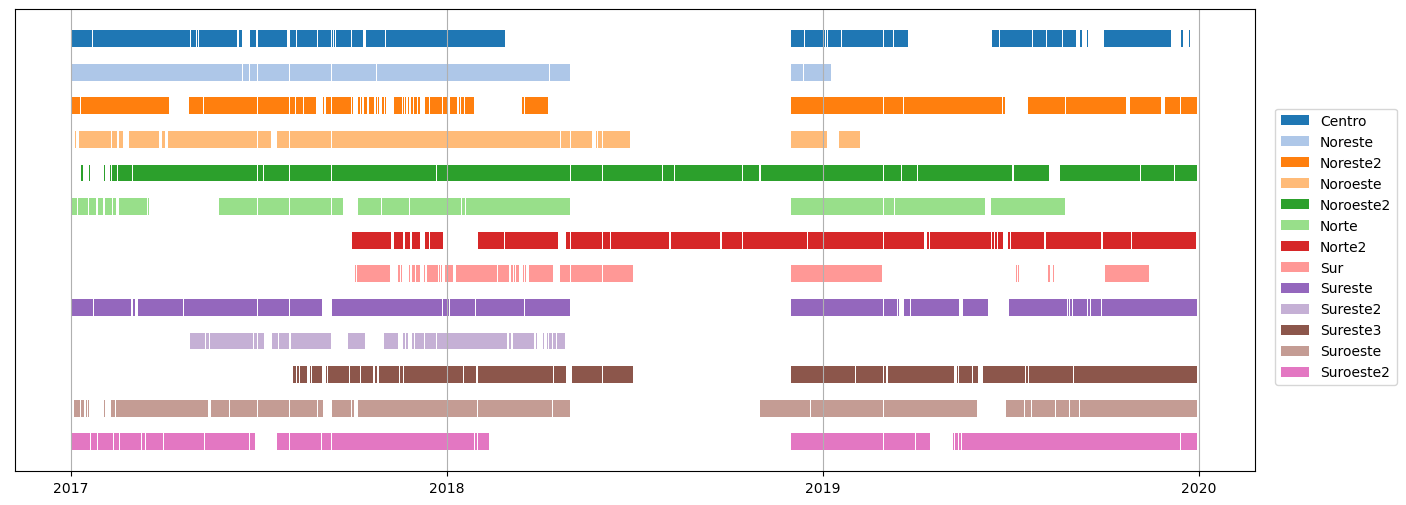

In [49]:
imputations(['CO'], df_pollutants_2017)

Ahora se agrega información geográfica de las estaciones de monitoreo.

In [50]:
df_stations = pd.read_csv('../data/estaciones_coords.csv')
df_stations

,station,abbr,lat,lon,h,c
0,Centro,C,25.6700,-100.3380,560,0
1,Noreste,NE,25.7500,-100.2550,476,1
2,Noreste2,NE2,25.7770,-100.1880,432,2
3,Noroeste,NO,25.7570,-100.3660,571,3
4,Noroeste2,NO2,25.7830,-100.5860,716,4
5,Norte,N,25.8000,-100.3440,528,5
6,Norte2,N2,25.5749,-100.2489,630,6
7,Sur,S,25.7295,-100.3099,520,7
8,Sureste,SE,25.6680,-100.2490,492,8
9,Sureste2,SE2,25.6460,-100.0960,387,9


In [51]:
df_pollutants_coords = df_stations.merge(
    df_pollutants_2017,
    # unir DataFrames de datos con coordenadas
    on = 'station'
)
df_pollutants_coords = df_pollutants_coords.drop(columns = ['c'])
df_pollutants_coords.head()

,station,abbr,lat,lon,h,timestamp,CO,NO,NO2,NOX,...,PM10,PM2_5,BP,RF,RH,SO2,SR,T,WV,WD
0,Centro,C,25.67,-100.338,560,2017-01-01 00:00:00,2.47,16.0,15.1,31.1,...,143.0,NaN,709.2,0.0,64.0,NaN,0.004,19.46,3.0,300.0
1,Centro,C,25.67,-100.338,560,2017-01-01 01:00:00,2.18,8.9,11.7,20.6,...,183.0,NaN,708.9,0.0,66.0,NaN,0.004,18.92,2.0,226.0
2,Centro,C,25.67,-100.338,560,2017-01-01 02:00:00,1.77,2.0,8.6,10.5,...,142.0,NaN,708.5,0.0,56.0,NaN,0.004,20.42,2.6,246.0
3,Centro,C,25.67,-100.338,560,2017-01-01 03:00:00,1.93,7.2,10.0,17.2,...,101.0,NaN,708.2,0.0,52.0,NaN,0.004,21.21,5.4,152.0
4,Centro,C,25.67,-100.338,560,2017-01-01 04:00:00,1.7,2.1,8.6,10.7,...,85.0,NaN,707.9,0.0,54.0,NaN,0.004,20.47,3.6,232.0


Dada la naturaleza de los datos, se sabe que $\text{NO}_x$ es la suma de $\text{NO}$ y $\text{NO}_2$. Se rellenan valores de alguna de estas variables, con la suma o resta de las dos restantes.

In [52]:
# Conteo de vacíos
nox_na = df_pollutants_coords[['NO', 'NO2', 'NOX']].isna().sum()
nox_na

NO     221971
NO2    230756
NOX    224879
dtype: int64

In [53]:
# NOx vacíos
df_nox_na = df_pollutants_coords[(~df_pollutants_coords.NO.isna()) & (~df_pollutants_coords.NO2.isna()) & (df_pollutants_coords.NOX.isna())]
# NOx = NO + NO2
df_pollutants_coords.loc[df_nox_na.index, 'NOX'] = df_pollutants_coords.loc[df_nox_na.index, 'NO'] + df_pollutants_coords.loc[df_nox_na.index, 'NO2']

In [54]:
# Con NO
df_no_na = df_pollutants_coords[(~df_pollutants_coords.NOX.isna()) & (~df_pollutants_coords.NO2.isna()) & (df_pollutants_coords.NO.isna())]
# NO = NOx - NO2
df_pollutants_coords.loc[df_no_na.index, 'NO'] = df_pollutants_coords.loc[df_no_na.index, 'NOX'] - df_pollutants_coords.loc[df_no_na.index, 'NO2']

In [55]:
# Y NO2
df_no2_na = df_pollutants_coords[(~df_pollutants_coords.NOX.isna()) & (~df_pollutants_coords.NO.isna()) & (df_pollutants_coords.NO2.isna())]
# NO2 = NOx - NO
df_pollutants_coords.loc[df_no2_na.index, 'NO2'] = df_pollutants_coords.loc[df_no2_na.index, 'NOX'] - df_pollutants_coords.loc[df_no2_na.index, 'NO']

In [56]:
# Reconstrucción
nox_na_new = df_pollutants_coords[['NO', 'NO2', 'NOX']].isna().sum()
nox_na - nox_na_new

NO      782
NO2    4936
NOX      38
dtype: int64

Ahora, se convierten todas las columnas de variables y sus valores, en una columna llamada variable y otra llamada valor, que se asignan a cada una de ellas, con los demás atributos.

In [57]:
# https://pandas.pydata.org/docs/reference/api/pandas.melt.html
df_pollutants_melt = pd.melt(
    df_pollutants_coords, 
    id_vars=['timestamp', 'station', 'abbr', 'lat', 'lon', 'h'], # Variables que se mantienen
    value_vars = df_pollutants_def.var_name # Variables que se compactan
)
df_pollutants_melt

,timestamp,station,abbr,lat,lon,h,variable,value
0,2017-01-01 00:00:00,Centro,C,25.670,-100.338,560,PM10,143.0
1,2017-01-01 01:00:00,Centro,C,25.670,-100.338,560,PM10,183.0
2,2017-01-01 02:00:00,Centro,C,25.670,-100.338,560,PM10,142.0
3,2017-01-01 03:00:00,Centro,C,25.670,-100.338,560,PM10,101.0
4,2017-01-01 04:00:00,Centro,C,25.670,-100.338,560,PM10,85.0
...,...,...,...,...,...,...,...,...
5124400,2019-12-31 19:00:00,Suroeste2,SO2,25.665,-100.413,636,WD,82
5124401,2019-12-31 20:00:00,Suroeste2,SO2,25.665,-100.413,636,WD,87
5124402,2019-12-31 21:00:00,Suroeste2,SO2,25.665,-100.413,636,WD,98
5124403,2019-12-31 22:00:00,Suroeste2,SO2,25.665,-100.413,636,WD,104


Para interpolar, no hace falta el nombre de la estación ni su abreviatura.

In [58]:
df_sel = df_pollutants_melt[['timestamp', 'lat', 'lon', 'h', 'variable', 'value']]
df_sel

,timestamp,lat,lon,h,variable,value
0,2017-01-01 00:00:00,25.670,-100.338,560,PM10,143.0
1,2017-01-01 01:00:00,25.670,-100.338,560,PM10,183.0
2,2017-01-01 02:00:00,25.670,-100.338,560,PM10,142.0
3,2017-01-01 03:00:00,25.670,-100.338,560,PM10,101.0
4,2017-01-01 04:00:00,25.670,-100.338,560,PM10,85.0
...,...,...,...,...,...,...
5124400,2019-12-31 19:00:00,25.665,-100.413,636,WD,82
5124401,2019-12-31 20:00:00,25.665,-100.413,636,WD,87
5124402,2019-12-31 21:00:00,25.665,-100.413,636,WD,98
5124403,2019-12-31 22:00:00,25.665,-100.413,636,WD,104


Más preprocesamiento, pero ahora enfocado a los métodos que nos interesan. Como los métodos de AA no trabajan con fechas, se convierten las fechas a enteros basados en la medida de [inicio de época de Unix](https://docs.python.org/3/library/time.html).

In [59]:
# https://stackoverflow.com/a/54312941
# https://stackoverflow.com/a/51245631
df_sel.timestamp = df_sel.timestamp.values.astype(np.int64) / 10 ** 9
df_sel

C:\Users\user\AppData\Local\Temp\ipykernel_20832\1444388773.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sel.timestamp = df_sel.timestamp.values.astype(np.int64) / 10 ** 9


,timestamp,lat,lon,h,variable,value
0,1.483229e+09,25.670,-100.338,560,PM10,143.0
1,1.483232e+09,25.670,-100.338,560,PM10,183.0
2,1.483236e+09,25.670,-100.338,560,PM10,142.0
3,1.483240e+09,25.670,-100.338,560,PM10,101.0
4,1.483243e+09,25.670,-100.338,560,PM10,85.0
...,...,...,...,...,...,...
5124400,1.577819e+09,25.665,-100.413,636,WD,82
5124401,1.577822e+09,25.665,-100.413,636,WD,87
5124402,1.577826e+09,25.665,-100.413,636,WD,98
5124403,1.577830e+09,25.665,-100.413,636,WD,104


Ahora, para tomar en cuenta las variables como parámetros de los modelos, se utiliza el método de one-hot endoding.

In [60]:
# https://towardsdatascience.com/ways-to-handle-categorical-data-before-train-ml-models-with-implementation-ffc213dc84ec
df_sel = pd.concat([df_sel, pd.get_dummies(df_sel.variable)], axis=1)
df_sel = df_sel.drop(columns= ['variable'])
df_sel

,timestamp,lat,lon,h,value,BP,CO,NO,NO2,NOX,O3,PM10,PM2_5,RF,RH,SO2,SR,T,WD,WV
0,1.483229e+09,25.670,-100.338,560,143.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,1.483232e+09,25.670,-100.338,560,183.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,1.483236e+09,25.670,-100.338,560,142.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,1.483240e+09,25.670,-100.338,560,101.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,1.483243e+09,25.670,-100.338,560,85.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5124400,1.577819e+09,25.665,-100.413,636,82,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5124401,1.577822e+09,25.665,-100.413,636,87,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5124402,1.577826e+09,25.665,-100.413,636,98,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5124403,1.577830e+09,25.665,-100.413,636,104,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


Muchos de los algoritmos de AA tienen como supuestos que los datos estén normalizados. Existen muchas maneras de hacerlo. Aquí se usa [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html), que devuelve cada columna a un rango $[0, 1] \in \mathbb{R}$,

In [61]:
from sklearn.preprocessing import MinMaxScaler

In [62]:
scaler = MinMaxScaler()
# https://stackoverflow.com/a/43383700
scaled = scaler.fit_transform(df_sel)
# https://datatofish.com/numpy-array-to-pandas-dataframe/
df_scaled = pd.DataFrame(scaled, columns = df_sel.columns)
df_scaled

,timestamp,lat,lon,h,value,BP,CO,NO,NO2,NOX,O3,PM10,PM2_5,RF,RH,SO2,SR,T,WD,WV
0,0.000000,0.704545,0.419983,0.585106,0.075931,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000038,0.704545,0.419983,0.585106,0.094495,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000076,0.704545,0.419983,0.585106,0.075466,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000114,0.704545,0.419983,0.585106,0.056437,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000152,0.704545,0.419983,0.585106,0.049011,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5124400,0.999848,0.693182,0.292972,0.787234,0.047619,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5124401,0.999886,0.693182,0.292972,0.787234,0.049940,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5124402,0.999924,0.693182,0.292972,0.787234,0.055045,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5124403,0.999962,0.693182,0.292972,0.787234,0.057830,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Selección de valores no vacíos.

In [63]:
df_dropna = df_scaled.dropna()
df_dropna

,timestamp,lat,lon,h,value,BP,CO,NO,NO2,NOX,O3,PM10,PM2_5,RF,RH,SO2,SR,T,WD,WV
0,0.000000,0.704545,0.419983,0.585106,0.075931,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000038,0.704545,0.419983,0.585106,0.094495,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000076,0.704545,0.419983,0.585106,0.075466,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000114,0.704545,0.419983,0.585106,0.056437,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000152,0.704545,0.419983,0.585106,0.049011,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5124400,0.999848,0.693182,0.292972,0.787234,0.047619,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5124401,0.999886,0.693182,0.292972,0.787234,0.049940,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5124402,0.999924,0.693182,0.292972,0.787234,0.055045,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5124403,0.999962,0.693182,0.292972,0.787234,0.057830,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Separación en conjuntos de entrenamiento y prueba.

Entrenamiento

In [64]:
# https://stackoverflow.com/a/35531218
df_train = df_dropna.sample(frac = 0.7)
x_train = df_train[df_pollutants_def.var_name]
y_train = df_train[['value']]

Prueba

In [65]:
df_test = df_dropna.drop(df_train.index)

x_test = df_test[df_pollutants_def.var_name]
y_test = df_test[['value']]